# Manual Annotation of Red-Winged Blackbird Vocalizations Using Raven Lite

This notebook documents a small bioacoustic annotation project conducted to demonstrate manual annotation of bird vocalizations using Raven Lite. Recordings of red-winged blackbirds (Agelaius phoeniceus) were obtained from xeno-canto.org and annotated to identify song vocalizations.

Each recording was annotated individually due to differences in recording parameters, and annotation tables were exported per file and later combined for analysis. This notebook summarizes the annotated selections and presents basic descriptive statistics and visualizations of song duration and frequency range.

## Combine the 14 CSV Files Of Selected Output From Raven Lite

In [1]:
# Imports needed for project
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# List all CSV files in Data/Annotations
files = glob.glob('../Data/Annotations_raw/*.csv')

# Combine all CSVs
df_list = [pd.read_csv(f) for f in files]
df_master = pd.concat(df_list, ignore_index=True)

# Save combined CSV in the same folder
df_master.to_csv('../Data/Annotations_combined/redwing_blackbird_song_annotations_master.csv', index=False)

print("Combined CSV created. Number of rows:", len(df_master))

Combined CSV created. Number of rows: 73


## Clean Up DataFrame And Create Needed Columns For Analysis

In [3]:
data = df_master.copy()
print(data.head(5))

   Selection           View  Channel  Begin Time (s)  End Time (s)  \
0          1  Spectrogram 1        1       35.289268     36.115173   
1          2  Spectrogram 1        1       77.248060     78.204371   
2          1  Spectrogram 1        1        3.680755      4.386049   
3          2  Spectrogram 1        1       10.711657     11.483073   
4          3  Spectrogram 1        1       18.381733     19.131108   

   Low Freq (Hz)  High Freq (Hz)  Delta Time (s)  Delta Freq (Hz)  \
0       1813.708        5820.738          0.8259         4007.030   
1       1434.095        6706.503          0.9563         5272.408   
2       2151.142        6073.814          0.7053         3922.671   
3       2488.576        6073.814          0.7714         3585.237   
4       2277.680        6073.814          0.7494         3796.134   

   Avg Power Density (dB FS/Hz) Annotation  
0                        -37.79       song  
1                        -35.82       song  
2                        -38.

In [4]:
#### Convert Hz columns to kHz for readability
data['Low Freq (kHz)'] = data['Low Freq (Hz)'] * 0.001
data['High Freq (kHz)'] = data['High Freq (Hz)'] * 0.001
data['Delta Freq (kHz)'] = data['Delta Freq (Hz)'] * 0.001

In [5]:
# Create a new column 'Song_ID' with numbers from 1 to 73 for reference in Plots
data['Song_ID'] = range(1, 74)
print(data.head())

   Selection           View  Channel  Begin Time (s)  End Time (s)  \
0          1  Spectrogram 1        1       35.289268     36.115173   
1          2  Spectrogram 1        1       77.248060     78.204371   
2          1  Spectrogram 1        1        3.680755      4.386049   
3          2  Spectrogram 1        1       10.711657     11.483073   
4          3  Spectrogram 1        1       18.381733     19.131108   

   Low Freq (Hz)  High Freq (Hz)  Delta Time (s)  Delta Freq (Hz)  \
0       1813.708        5820.738          0.8259         4007.030   
1       1434.095        6706.503          0.9563         5272.408   
2       2151.142        6073.814          0.7053         3922.671   
3       2488.576        6073.814          0.7714         3585.237   
4       2277.680        6073.814          0.7494         3796.134   

   Avg Power Density (dB FS/Hz) Annotation  Low Freq (kHz)  High Freq (kHz)  \
0                        -37.79       song        1.813708         5.820738   
1     

In [6]:
# Drop unnecessary columns
data = data.drop(columns=['Selection', 'View', 'Channel'])

# Reorder columns for readability
data = data[['Song_ID','Annotation', 'Begin Time (s)', 'End Time (s)', 'Low Freq (kHz)', 'High Freq (kHz)', 'Delta Time (s)', 'Delta Freq (kHz)']]

# Save cleaned version
data.to_csv('../Data/Annotations_combined/redwing_blackbird_song_annotations_master_clean.csv', index=False)
print(data.head(3))

   Song_ID Annotation  Begin Time (s)  End Time (s)  Low Freq (kHz)  \
0        1       song       35.289268     36.115173        1.813708   
1        2       song       77.248060     78.204371        1.434095   
2        3       song        3.680755      4.386049        2.151142   

   High Freq (kHz)  Delta Time (s)  Delta Freq (kHz)  
0         5.820738          0.8259          4.007030  
1         6.706503          0.9563          5.272408  
2         6.073814          0.7053          3.922671  


## Data Analysis

### Summmary Statistics
Basic summary statistics were calculated to characterize the temporal and spectral properties of annotated song selections prior to visualization.

In [7]:
cols = ['Delta Time (s)','Low Freq (kHz)', 'High Freq (kHz)','Delta Freq (kHz)']
np.round(data[cols].describe(), 2).T[['min','max','mean']]


,min,max,mean
Delta Time (s),0.70,1.69,1.14
Low Freq (kHz),0.46,2.50,1.53
High Freq (kHz),4.56,7.79,6.22
Delta Freq (kHz),3.02,6.78,4.69


Annotated song selections ranged from 0.70 to 1.69 seconds in duration (mean 1.14 s). Frequency bounds varied across selections, with low frequencies ranging from 0.46 to 2.50 kHz and high frequencies from 4.56 to 7.79 kHz. Observed frequency ranges reflect natural variability across recordings.

### Create Histogram of Song Durations

Song durations are calculated as the end time minus the beginning time. This calculation is done for us in Raven Lite (and Pro) and given as Delta Time (s).    

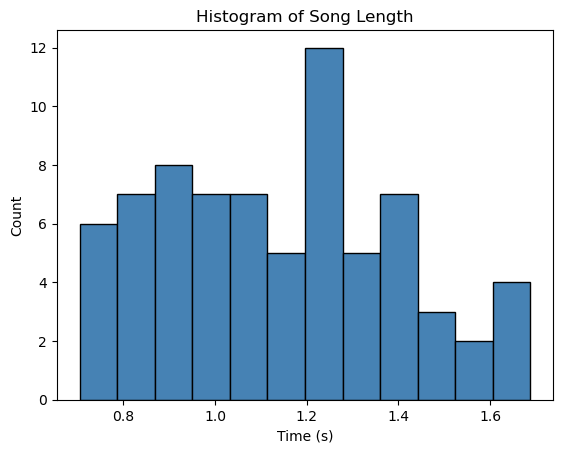

In [8]:
# Create the histogram
plt.hist(data['Delta Time (s)'], bins=12, color='steelblue', edgecolor='black') #

# 3. Add labels and title
plt.title('Histogram of Song Length')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 4. Display the plot
plt.show()

Annotated song durations ranged from approximately 0.7 to 1.7 seconds, with most selections clustering between roughly 1.0 and 1.3 seconds. This distribution is consistent with the summary statistics reported above.

### Create A Frequency Range Band Plot

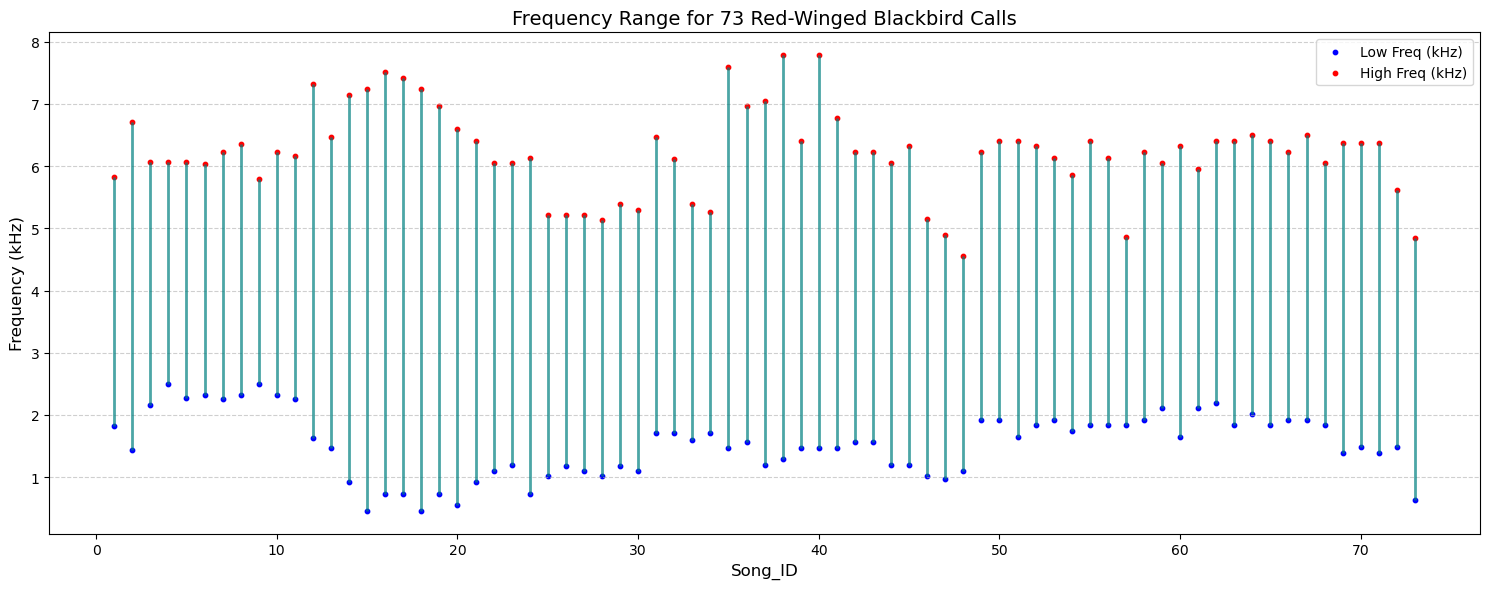

In [9]:
# Create the plot
plt.figure(figsize=(15, 6))

# plt.vlines(x, ymin, ymax)
plt.vlines(x=data['Song_ID'], 
           ymin=data['Low Freq (kHz)'], 
           ymax=data['High Freq (kHz)'], 
           colors='teal', 
           alpha=0.7, 
           linewidth=2)

# Add dots at the top and bottom for clarity
plt.scatter(data['Song_ID'], data['Low Freq (kHz)'], color='blue', s=10, label='Low Freq (kHz)')
plt.scatter(data['Song_ID'], data['High Freq (kHz)'], color='red', s=10, label='High Freq (kHz)')

# Formatting
plt.title('Frequency Range for 73 Red-Winged Blackbird Calls', fontsize=14)
plt.xlabel('Song_ID', fontsize=12)
plt.ylabel('Frequency (kHz)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

While overall frequency ranges are consistent with the summary statistics above, individual selections show variation in both lower and upper frequency bounds.